# SCORING MODEL



### Objetif du projet :
Pour accorder un crédit à la consommation, l’entreprise calcule la probabilité qu’un client le rembourse, ou non. Elle souhaite donc développer un algorithme de scoring pour aider à décider si un prêt peut être accordé à un client.

Les chargés de relation client seront les utilisateurs du modèle de scoring. Puisqu’ils s’adressent aux clients, ils ont besoin que notre modèle soit **facilement interprétable**. Les chargés de relation souhaitent, en plus, disposer d’une mesure de **l’importance des variables** qui ont poussé le modèle à donner cette probabilité à un client.




Nous allons suivre les étapes suivantes :

- Nettoyage des données
- EDA
- Choix de variables et création de nouvelles variables
- Choix de modèles de classification
- Essaye d'interprétabilité du modèle


# 1. Garbage In Garbage Out


In [125]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 


# pandas display settings 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
from utils import utils_prep as prep
from utils import utils_eng as eng

In [1216]:
app_train_raw=prep.readCsvFileFromDir("data/",'application_train.csv')

In [1218]:
app_train_raw.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [1219]:
prep.firstStats(app_train_raw)

,stats
nbRows,307511
nbColumns,122
float64,65
int64,41
object,16


In [1221]:
prep.missingValues(app_train_raw.select_dtypes('object'))

,Missing Values,% of Total Values
FONDKAPREMONT_MODE,210295,68.4
WALLSMATERIAL_MODE,156341,50.8
HOUSETYPE_MODE,154297,50.2
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
NAME_TYPE_SUITE,1292,0.4
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
FLAG_OWN_REALTY,0,0.0


In [1222]:
prep.missingValues(app_train_raw.select_dtypes(['int64', 'float64']))

,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
FLOORSMIN_MEDI,208642,67.8


In [1231]:
app_train=prep.manageMissingData(app_train_raw)

In [ ]:
#prep.manageMissingData(app_train)
# imputation well done

In [1232]:
app_train.head(3)

,key_0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,12.061091,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.02470,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.00000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.02500,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,0.014900,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,12.061091,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.510853,0.09590,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.08060,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.09680,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,0.071400,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.000000,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.502130,0.555912,0.729567,0.11744,0.088442,0.977735,0.75247

In [1233]:
prep.firstStats(app_train)

,stats
nbRows,307511
nbColumns,123
float64,65
int64,42
object,16


In [127]:
#app_train=prep.readCsvFileFromDir("data/",'app_train_clean.csv')

In [1234]:
#app_train['SK_ID_CURR']=app_train.key_0
app_train.drop(columns=['key_0'], inplace=True)
app_train.set_index('SK_ID_CURR', inplace=True)

In [1235]:
app_train.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [1236]:
app_train.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [1237]:
app_train.drop(app_train[app_train['CODE_GENDER']=='XNA'].index, inplace=True)
app_train.drop(app_train[app_train['NAME_FAMILY_STATUS']=='Unknown'].index, inplace=True)

In [1238]:
app_train.head(3)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,12.061091,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.02470,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.00000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.02500,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,0.014900,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,12.061091,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.510853,0.09590,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.08060,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.09680,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,0.071400,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,2

In [1239]:
prep.firstStats(app_train)

,stats
nbRows,307505
nbColumns,121
float64,65
int64,40
object,16


In [1242]:
app_train.TARGET.value_counts(normalize=True)*100

0    91.926961
1     8.073039
Name: TARGET, dtype: float64

The training data is unbalanced. One of the outcome represent more than 91% of the cases. Since we have enough data ( examples or number of rows), we are going to some undersampling later on. 

We choose to do the analysis with the whole data and then do the imbalancing  process just before the training and model selection.


We realize that we should balance the data before starting any analysis. If not the analysis will be biased

In [ ]:
app_train_clean=app_train.copy()

In [1260]:
app_train=app_train[app_train.TARGET==1].append(app_train[app_train.TARGET==0].iloc[:24825]).sample(frac=1)

In [1262]:
app_train.head(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
419983,1,1,135000.0,1056636.0,34083.0,882000.0,0.018029,-15077,-1936,-4088.0,-1653,22.000000,1,1,0,1,0,0,3.0,3,3,13,0,0,0,1,1,1,0.50213,0.579979,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.07449,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.11785,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,0.0,0.0,0.0,0.0,-1376.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,Drivers,TUESDAY,Self-employed,Unknown,Unknown,Unknown,Unknown
367724,1,0,99000.0,225000.0,13594.5,225000.0,0.018850,-17698,-2723,-1263.0,-1248,12.061091,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,0.50213,0.676639,0.522697,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.07449,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.11785,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,0.0,0.0,0.0,0.0,-1086.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,FRIDAY,Business Entity Type 3,Unknown,Unknown,Unknown,Unknown
121748,1,0,171000.0,675000.0,32602.5,675000.0,0.026392,-20569,365243,-316.0,-3970,12.061091,1,0,0,1,0,

In [1263]:
prep.firstStats(app_train)

,stats
nbRows,49650
nbColumns,121
float64,65
int64,40
object,16


In [590]:
# What is going to be the process?

# take a variable -> check for correlation, decription, distribution with respect to the target,

# 2. EDA

To understand what is inside the data and how variables are interconnected, we are going to lauch a correlation search process that return a list of correlated variables for each varible in the dataset.

In [1264]:
df_ql=app_train.select_dtypes(['object'])
df_qn=app_train.select_dtypes(['float64', 'int64'])

In [1265]:

for x in df_qn.columns:
    print(eng.corrByVarList(df_qn, x))


Variables that are very correlated with TARGET
[]

Variables that are very correlated with CNT_CHILDREN
['CNT_FAM_MEMBERS']

Variables that are very correlated with AMT_INCOME_TOTAL
[]

Variables that are very correlated with AMT_CREDIT
['AMT_GOODS_PRICE', 'AMT_ANNUITY']

Variables that are very correlated with AMT_ANNUITY
['AMT_GOODS_PRICE', 'AMT_CREDIT']

Variables that are very correlated with AMT_GOODS_PRICE
['AMT_CREDIT', 'AMT_ANNUITY']

Variables that are very correlated with REGION_POPULATION_RELATIVE
['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

Variables that are very correlated with DAYS_BIRTH
['FLAG_EMP_PHONE', 'DAYS_REGISTRATION', 'EXT_SOURCE_1', 'FLAG_DOCUMENT_6', 'DAYS_EMPLOYED']

Variables that are very correlated with DAYS_EMPLOYED
['FLAG_DOCUMENT_6', 'DAYS_BIRTH', 'FLAG_EMP_PHONE']

Variables that are very correlated with DAYS_REGISTRATION
['DAYS_BIRTH']

Variables that are very correlated with DAYS_ID_PUBLISH
[]

Variables that are very correlated with OWN


Variables that are very correlated with APARTMENTS_MODE
['APARTMENTS_MEDI', 'APARTMENTS_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'TOTALAREA_MODE', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'LANDAREA_MODE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI']

Variables that are very correlated with BASEMENTAREA_MODE
['BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MODE', 'APARTMENTS_AVG', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'TOTALAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'ELEVATORS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', '


Variables that are very correlated with ENTRANCES_MEDI
['ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_AVG']

Variables that are very correlated with FLOORSMAX_MEDI
['FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'TOTALAREA_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'LIVINGAREA_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'APARTMENTS_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_AVG', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI']


In [ ]:
# essayons d'explorer les relation entre les variables avec une ACP

We can see that some variables appear to be very correlated. We are to find 



['ELEVATORS_MEDI', 'ELEVATORS_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'TOTALAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG']


Those variable represent the life style of the client : his living standard, living area, and so on ...

We are going to find a way to regroup them. Let's use PCA and see if they are going to be regrouped in one of the new axes.

In [1266]:
# PCA. using our pcaDataFrame function that takes a df, scale it, fit pca, and return three data : 
#  A ->  the matrice of correlation btw former and new variables
# B -> the pca fitting instance
# C  ->  the data frame of variable/individuals
A, B, C=eng.pcaDataFrame(df_qn.drop(columns=['TARGET'],axis=1))

In [1246]:
type(B), type(A), type(C)

(sklearn.decomposition._pca.PCA,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [1267]:
C.head(3)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75,PC_76,PC_77,PC_78,PC_79,PC_80,PC_81,PC_82,PC_83,PC_84,PC_85,PC_86,PC_87,PC_88,PC_89,PC_90,PC_91,PC_92,PC_93,PC_94,PC_95,PC_96,PC_97,PC_98,PC_99,PC_100,PC_101,PC_102,PC_103,PC_104
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
419983,0.037867,0.116249,2.183247,-0.352187,0.005447,-0.324852,0.679160,0.500675,1.938950,-0.454398,0.099633,-2.229951,0.065514,0.188217,-1.171355,0.170827,-1.789544,0.017924,-1.144530,-0.612065,1.250510,-0.592233,-0.925596,-0.040871,0.757843,-0.415152,-0.475634,0.762276,0.091222,-0.256755,-0.209368,0.071471,0.083988,-0.210463,0.136829,-0.016440,-0.131052,-0.038210,-0.220757,0.289541,-0.060601,0.528445,0.054483,-0.456443,-0.219714,-0.327714,-0.374336,-0.053349,1.161553,0.316195,0.579285,0.846269,-0.358538,-0.335713,0.017332,0.083814,-1.460109,0.021051,-0.862502,-0.428061,0.107134,-0.309546,0.058801,-0.343163,-0.164045,0.051257,0.016731,-0.047676,0.029165,1.004116,-0.449946,-0.058283,0.009059,-0.006781,-0.000387,-0.003179,0.002953,-0.001284,-0.002037,-0.005408,-0.084861,0.062078,0.002622,-0.011587,-0.003524,0.000856,-0.003425,-0.001736,-0.001937,0.001623,-0.000058,-0.002775,0.002288,-0.000306,0.001372,0.000091,0.000365,-0.001021,0.000099,0.000704,0.000668,-0.001446,5.550514e-16,-4.146826e-16
367724,0.161014,0.035067,-0.124857,-0.497177,0.226680,0.323189,-1.203012,0.019274,-0.134705,0.939684,0.337802,0.927144,0.228003,-1.081059,-0.009043,0.496600,0.248338,0.713860,0.415703,-0.259219,-0.230751,-0.896895,-0.496495,-0.206720,0.736644,-0.199237,-0.104435,-0.104644,-0.278608,0.328703,-0.181413,0.211692,0.140477,-0.229766,0.006732,-0.072567,-0.303241,-0.076773,0.182602,-0.291962,-0.065977,-0.108218,-0.304965,0.193400,0.113150,-1.107706,-0.210338,-0.112565,0.773264,0.943770,-0.138599,1.222452,-0.068548,0.111985,-0.356091,0.454904,0.158119,-0.039031,-0.032274,-0.240608,0.079695,-0.717736,0.001643,-0.010277,-0.262887,-0.003660,-0.005828,-0.266734,0.000342,0.013037,0.000110,-0.017907,-0.004446,-0.009401,0.001280,0.000602,0.006512,0.006867,-0.000689,0.001402,0.066287,-0.061621,0.003666,-0.000192,0.000622,-0.000363,0.000578,-0.002119,0.001262,0.001098,-0.001556,-0.000859,0.001216,-0.001949,0.001800,-0.000634,-0.000055,-0.000503,-0.001291,0.000085,-0.000432,0.000522,1.221543e-17,-6.488586e-17
121748,0.220001,-0.025993,-2.839898,-0.023790,0.090103,-0.133378,-0.214555,0.403265,1.006465,-0.276498,0.092846,-0.661411,0.154940,-0.322779,0.194523,0.115618,0.202631,1.323498,-0.306732,-0.693420,0.098045,0.880624,0.311590,0.190568,-1.273653,0.024885,0.061997,-0.364004,0.324147,-0.148741,0.083110,0.207801,0.013316,0.019547,0.168873,-0.002072,0.109128,-0.174834,0.000321,-0.096141,-0.068024,0.156921,-0.153472,-0.034022,0.140692,-0.359781,0.457933,-0.092759,-0.297668,0.923027,-1.128659,-1.137147,0.512631,-0.012119,0.051924,0.181606,0.007558,0.758425,0.276723,-1.734345,-0.106167,0.299845,-0.022885,-0.030053,0.204095,-0.012552,-0.009386,0.463743,-0.009696,-0.018809,-0.000877,-0.049075,0.000091,0.007135,0.003815,0.000273,-0.007617,-0.004082,0.002119,0.011744,0.117107,-0.096954,0.003194,0.009446,0.002758,-0.002554,-0.001399,-0.000954,0.001562,0.000324,-0.000790,0.000969,-0.002502,-0.001181,0.001858,-0.000080,0.000738,-0.001216,0.000814,-0.000464,-0.000874,0.003660,1.214164e-17,4.054477e-16


In [1268]:
B.explained_variance_ratio_[:10]*100

array([17.35114101,  4.60319895,  3.9763884 ,  3.24494197,  3.13358634,
        2.87500449,  2.52685618,  2.47168927,  2.42737333,  2.25070029])

In [ ]:
# Que represente ce premier axe?

In [1269]:
A.iloc[:5,30:73]

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
PC_1,0.218053,0.168723,0.021209,0.099315,0.132508,0.204142,0.143699,0.164756,0.121547,0.128808,0.191270,0.220381,0.043255,0.081847,0.214325,0.165705,0.019980,0.099290,0.131581,0.202285,0.139165,0.164183,0.120067,0.127548,0.191835,0.217171,0.042384,0.078934,0.217834,0.168913,0.020907,0.099168,0.132998,0.204174,0.143200,0.164412,0.121482,0.129920,0.191413,0.220541,0.043285,0.081389,0.215028
PC_2,0.039944,0.158795,-0.052082,-0.184487,-0.022142,-0.053806,0.277064,-0.238359,-0.272189,0.178278,-0.007979,0.040577,-0.038052,-0.002216,0.053135,0.170253,-0.049624,-0.180548,-0.012352,-0.045748,0.281384,-0.233873,-0.268289,0.184122,0.002870,0.053535,-0.034951,0.007324,0.041623,0.160304,-0.052152,-0.184772,-0.021127,-0.052982,0.277967,-0.238745,-0.272809,0.180317,-0.006934,0.041391,-0.037546,0.000299,0.028660
PC_3,-0.001133,0.007865,-0.008076,0.027351,0.011562,-0.007828,0.008236,-0.018758,-0.012372,0.017682,0.006469,-0.002428,0.004088,0.014143,0.000595,0.009980,-0.007868,0.028071,0.013374,-0.006454,0.009358,-0.017663,-0.011609,0.018379,0.007656,0.000033,0.004402,0.015101,-0.000929,0.008305,-0.008040,0.027472,0.011982,-0.007524,0.008407,-0.018607,-0.012284,0.017512,0.006711,-0.001878,0.004109,0.014618,-0.000417
PC_4,0.009273,0.004018,-0.189888,-0.237594,-0.014381,0.031567,0.030896,-0.009743,-0.035645,-0.044209,-0.019466,0.024432,0.029892,0.101221,0.003728,-0.000864,-0.188303,-0.238051,-0.018327,0.026496,0.028195,-0.013416,-0.038682,-0.044826,-0.024441,0.018888,0.030011,0.096305,0.007655,0.003681,-0.189466,-0.237877,-0.015728,0.030052,0.030650,-0.011133,-0.036625,-0.044410,-0.020186,0.023266,0.029893,0.099594,0.018282
PC_5,-0.012643,-0.024857,-0.162247,-0.023676,0.070051,-0.024263,-0.056830,-0.025352,-0.021750,-0.051092,0.017124,-0.033054,0.422019,0.293521,-0.017616,-0.022511,-0.162757,-0.023119,0.072043,-0.026035,-0.057834,-0.028341,-0.021375,-0.051281,0.014216,-0.032028,0.419928,0.292565,-0.015911,-0.024725,-0.161623,-0.023430,0.070651,-0.024080,-0.057031,-0.025414,-0.021498,-0.051402,0.017452,-0.033351,0.422550,0.294574,-0.020021


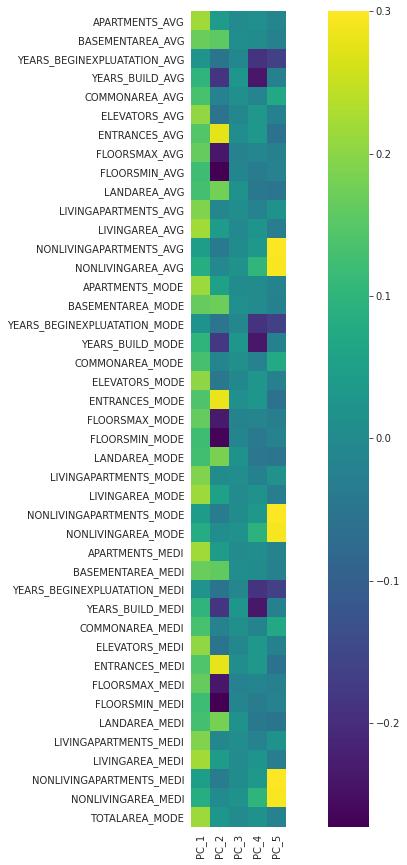

In [1270]:
corr = A.iloc[:5,30:73].T
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,  vmax=.3, square=True, cmap='viridis')

In [1271]:
df_qn['LIFE_STYLE']=C.PC_1
eng.corrByVarList(df_qn,'LIFE_STYLE' )


Variables that are very correlated with LIFE_STYLE


['LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'LIVINGAREA_MODE',
 'TOTALAREA_MODE',
 'APARTMENTS_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE']

#### Domain expert features

We are going to use our understanding of the data to choose and create some variables

In [ ]:
# let's go from quantitative variables

In [1272]:
df_qn.head(2)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,LIFE_STYLE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
419983,1,1,135000.0,1056636.0,34083.0,882000.0,0.018029,-15077,-1936,-4088.0,-1653,22.000000,1,1,0,1,0,0,3.0,3,3,13,0,0,0,1,1,1,0.50213,0.579979,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.07449,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.11785,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,0.0,0.0,0.0,0.0,-1376.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.037867
367724,1,0,99000.0,225000.0,13594.5,225000.0,0.018850,-17698,-2723,-1263.0,-1248,12.061091,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,0.50213,0.676639,0.522697,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.07449,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.11785,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,0.0,0.0,0.0,0.0,-1086.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,0.161014


In [1273]:
# this variable AMT_INCOME_TOTAL is not significantly correlated with any of the variables in our data set

eng.corrByVarList(dfq, 'AMT_INCOME_TOTAL')


Variables that are very correlated with AMT_INCOME_TOTAL


[]

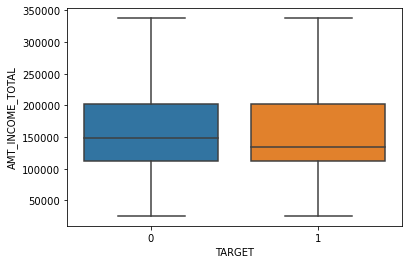

In [1274]:
ax=sns.boxplot(data=app_train, x=app_train.TARGET, y=(app_train.AMT_INCOME_TOTAL), showfliers=False)

In [1249]:
# But it show some interesting dispersion with respect to the TARGET value

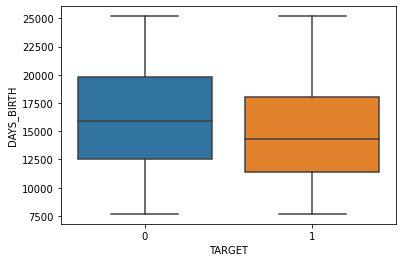

In [1275]:
ax=sns.boxplot(data=app_train, x=app_train.TARGET, y=(abs(app_train.DAYS_BIRTH)), showfliers=False)

In [1276]:
# Interesting to see, but obvious the age is a factor to decide whether a give a credit or not

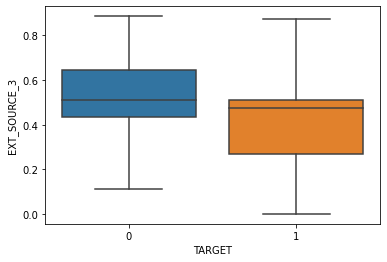

In [1277]:
k=sns.boxplot(data=app_train, x=app_train.TARGET, y=(abs(app_train.EXT_SOURCE_3)), showfliers=False)

## 3. Feature Engineering

Through this step we are going to select features and create new ones 

Some of the 15 most correlated variables with the TARGET variable

In [1470]:
corrcoef = df_qn.corr()["TARGET"]

corrcoef.sort_values().dropna().iloc[np.r_[0:15, -5:-1]]

EXT_SOURCE_3                  -0.273241
EXT_SOURCE_2                  -0.271334
EXT_SOURCE_1                  -0.180597
DAYS_EMPLOYED                 -0.087020
AMT_GOODS_PRICE               -0.079831
REGION_POPULATION_RELATIVE    -0.070031
AMT_CREDIT                    -0.061562
FLAG_DOCUMENT_6               -0.054221
FLOORSMAX_AVG                 -0.051609
FLOORSMAX_MEDI                -0.051255
FLOORSMAX_MODE                -0.050738
LIFE_STYLE                    -0.048118
HOUR_APPR_PROCESS_START       -0.046140
FLAG_PHONE                    -0.043224
LIVINGAREA_AVG                -0.041062
DAYS_LAST_PHONE_CHANGE         0.105135
REGION_RATING_CLIENT           0.112218
REGION_RATING_CLIENT_W_CITY    0.115207
DAYS_BIRTH                     0.145222
Name: TARGET, dtype: float64

In [1281]:
df_ql.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,
419983,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,Drivers,TUESDAY,Self-employed,Unknown,Unknown,Unknown,Unknown
367724,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,FRIDAY,Business Entity Type 3,Unknown,Unknown,Unknown,Unknown
121748,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,Unknown,FRIDAY,XNA,Unknown,Unknown,Unknown,Unknown
101765,Cash loans,M,Y,Y,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,Core staff,WEDNESDAY,Self-employed,reg oper account,block of flats,Panel,No
115321,Cash loans,M,Y,Y,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,Unknown,THURSDAY,XNA,Unknown,Unknown,Unknown,Unknown


In [1282]:

df_ql.shape

(49650, 16)

In [1283]:
# Intuitively we can choose some variables and see if they matter
df_ql1=df_ql[['CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
              'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']]

In [1284]:
df_ql1['TARGET']=app_train.TARGET

In [1285]:
df_ql.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,
419983,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,Drivers,TUESDAY,Self-employed,Unknown,Unknown,Unknown,Unknown
367724,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,FRIDAY,Business Entity Type 3,Unknown,Unknown,Unknown,Unknown
121748,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,Unknown,FRIDAY,XNA,Unknown,Unknown,Unknown,Unknown
101765,Cash loans,M,Y,Y,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,Core staff,WEDNESDAY,Self-employed,reg oper account,block of flats,Panel,No
115321,Cash loans,M,Y,Y,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,Unknown,THURSDAY,XNA,Unknown,Unknown,Unknown,Unknown


In [609]:
df_ql1.head(2)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,TARGET
SK_ID_CURR,,,,,,,
100002,M,N,Y,Working,Secondary / secondary special,Single / not married,1
100003,F,N,N,State servant,Higher education,Married,0


In [1465]:
#prep.describeData(df_ql1)

In [1287]:
df_ql1.NAME_INCOME_TYPE.value_counts()

Working                 28001
Commercial associate    11077
Pensioner                7561
State servant            2997
Unemployed                 10
Student                     2
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

In [1466]:
#Let's regroup some modalities for NAME_INCOME_TYPE

In [1289]:
df_ql1['NAME_INCOME_TYPE']= np.where(df_ql1.NAME_INCOME_TYPE=='Pensioner', 
                                                            'Unemployed', df_ql1['NAME_INCOME_TYPE'])

df_ql1['NAME_INCOME_TYPE']= np.where(df_ql1.NAME_INCOME_TYPE=='Student', 
                                                            'Unemployed', df_ql1['NAME_INCOME_TYPE'])

df_ql1['NAME_INCOME_TYPE']= np.where(df_ql1.NAME_INCOME_TYPE=='Maternity leave', 
                                                            'Unemployed', df_ql1['NAME_INCOME_TYPE'])

df_ql1['NAME_INCOME_TYPE']= np.where(df_ql1.NAME_INCOME_TYPE=='Commercial associate', 
                                                            'Businessman', df_ql1['NAME_INCOME_TYPE'])

In [1290]:
df_ql1.NAME_INCOME_TYPE.value_counts()

Working          28001
Businessman      11077
Unemployed        7575
State servant     2997
Name: NAME_INCOME_TYPE, dtype: int64

In [1467]:
#prep.describeData(df_ql1)

###  3.1. Some Data Explorations

The higher the education the less likely the repayment


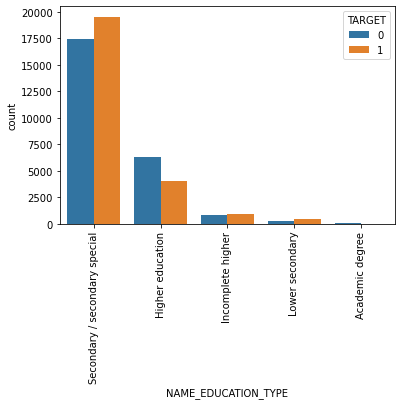

In [1292]:
print("The higher the education the less likely the repayment")
ax=sns.countplot(data=df_ql1, x='NAME_EDUCATION_TYPE', hue='TARGET')
ax.tick_params(axis='x', rotation=90)

Married people that have problem of reimbursements


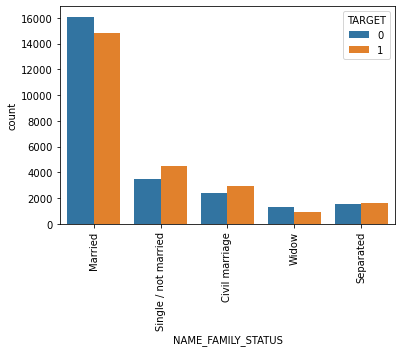

In [1468]:
print("Married people that have problem of reimbursements")
ax=sns.countplot(data=df_ql1, x='NAME_FAMILY_STATUS', hue='TARGET')
ax.tick_params(axis='x', rotation=90)

It looks like gender does matter


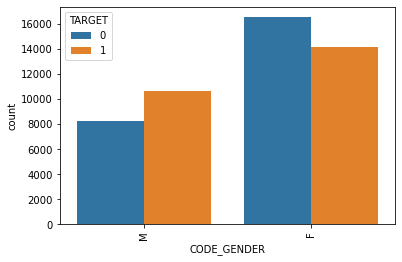

In [1295]:
print("It looks like gender does matter")
ax=sns.countplot(data=df_ql1, x='CODE_GENDER',  hue='TARGET' )
ax.tick_params(axis='x', rotation=90)

It looks like INCOME ORIGIN does matter


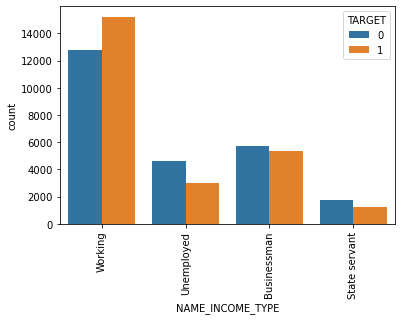

In [1469]:
print("It looks like INCOME ORIGIN does matter")
ax=sns.countplot(data=df_ql1, x='NAME_INCOME_TYPE',  hue='TARGET' )
ax.tick_params(axis='x', rotation=90)

In [1298]:
# let's see if some one hot encodng can work with those variables
df_ql1.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'TARGET'],
      dtype='object')

In [1473]:
# onehot encoding using get_dummies with drop_first option to True

In [1299]:
df_ql_eng=pd.get_dummies(df_ql1.drop(columns=['TARGET'],axis=1),
                         columns=[ 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'], drop_first=True)

In [1300]:
df_ql_eng.head()

,CODE_GENDER,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
SK_ID_CURR,,,,,,,,,,,,,,
419983,M,1,1,0,0,1,0,0,0,1,1,0,0,0
367724,F,0,0,0,0,1,0,0,0,1,1,0,0,0
121748,F,0,1,0,1,0,0,0,0,1,0,0,1,0
101765,M,1,1,0,0,0,1,0,0,0,0,0,1,0
115321,M,1,1,0,1,0,0,0,0,1,0,0,0,0


In [1303]:
df_ql_eng.shape

(49650, 14)

In [ ]:

# Let's  do frequency encoding with NAME_INCOME_TYPE, ORGANIZATION_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS
# we are going to comby them with other variables

In [1304]:
df_ql_eng.head()

,CODE_GENDER,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
SK_ID_CURR,,,,,,,,,,,,,,
419983,M,1,1,0,0,1,0,0,0,1,1,0,0,0
367724,F,0,0,0,0,1,0,0,0,1,1,0,0,0
121748,F,0,1,0,1,0,0,0,0,1,0,0,1,0
101765,M,1,1,0,0,0,1,0,0,0,0,0,1,0
115321,M,1,1,0,1,0,0,0,0,1,0,0,0,0


In [1305]:
df_ql=df_ql_eng.copy()

In [1306]:
df_ql_eng.shape

(49650, 14)

In [1307]:
# partons d'unedf vide et remplissons là
df_eng=pd.DataFrame(index=df_qn.index)

In [1308]:
df_ql.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Unemployed',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow'],
      dtype='object')

### 3.2. Domain expert variables

In [1311]:
# some other variables
# EXT_SOURCE_2 EXT_SOURCE_3
df_eng['EXT_SOURCE_1']= df_qn['EXT_SOURCE_1']
df_eng['EXT_SOURCE_2']= df_qn['EXT_SOURCE_2']
df_eng['EXT_SOURCE_3']= df_qn['EXT_SOURCE_3']

df_eng['LIFE_STYLE']=df_qn.LIFE_STYLE 


df_eng['DAYS_BIRTH']=df_qn.DAYS_BIRTH
df_eng['DAYS_EMPLOYED']=df_qn.DAYS_EMPLOYED
df_eng['AMT_GOODS_PRICE']=df_qn.AMT_GOODS_PRICE 
df_eng['DAYS_LAST_PHONE_CHANGE']=df_qn.DAYS_LAST_PHONE_CHANGE 
# DAYS_BIRTH, DAYS_EMPLOYED, AMT_GOODS_PRICE, DAYS_LAST_PHONE_CHANGE,  EXT_SOURCE_1, EXT_SOURCE_2


# Family situation relative income
df_eng['INCOME_FAMILY_IND1']= df_qn.AMT_INCOME_TOTAL*df_ql['NAME_FAMILY_STATUS_Married']/df_qn.CNT_FAM_MEMBERS

df_eng['INCOME_EDUCATION_IND3']= df_qn.AMT_INCOME_TOTAL*df_ql['NAME_EDUCATION_TYPE_Secondary / secondary special']

# poor region with less income ofr may be less good price, if not the case it is good bias
df_eng['INCOME_REGION_IND']= df_qn.AMT_INCOME_TOTAL*df_qn.REGION_RATING_CLIENT/df_qn.AMT_GOODS_PRICE

# the credit amount relative good price in the region. it shows the specificity of the region 
df_eng['CREDIT_REGION_IND']= df_qn.AMT_CREDIT*df_qn.REGION_RATING_CLIENT/df_qn.AMT_GOODS_PRICE

# the same for region with city
df_eng['INCOME_REGION_CITY_IND']= df_qn.AMT_INCOME_TOTAL*df_qn.REGION_RATING_CLIENT_W_CITY/df_qn.AMT_GOODS_PRICE

# the higher the number of annuity with respect to the good price or the credit price 
# the less likely the repayment
df_eng['AMT_GOOD_PRICE_ANNUITY_RATIO']=df_qn.AMT_GOODS_PRICE/df_qn.AMT_ANNUITY

df_eng['AMT_CREDIT_ANNUITY_RATIO']= df_qn.AMT_CREDIT/df_qn.AMT_ANNUITY

# the loaner has may be a side money or is rich
df_eng['AMT_CREDIT_GOODS_PRICE_RATIO']= df_qn.AMT_CREDIT/df_qn.AMT_GOODS_PRICE

# Is he solvable?
df_eng['AMT_CREDIT_INCOME_RATIO']= df_qn.AMT_CREDIT/df_qn.AMT_INCOME_TOTAL

In [1313]:
# let's combine some variables since I am going to use non linear model, I don't mind having redundant information


# INCOME_FAMILY_IND1, INCOME_EDUCATION_IND3, INCOME_REGION_IND,  CREDIT_REGION_IND, INCOME_REGION_CITY_IND, 
# AMT_GOOD_PRICE_ANNUITY_RATIO, AMT_CREDIT_ANNUITY_RATIO, AMT_CREDIT_GOODS_PRICE_RATIO, AMT_CREDIT_INCOME_RATIO
# INCOME_AGE_RATIO, FAMILY_INCOME_RATIO,  CREDIT_AGE_RATIO, CREDIT_DAYS_REGISTRATION_RATIO,
# CREDIT_DAYS_EMPLOYED_RATIO, INCOME_DAYS_EMPLOYED_RATIO, DAYS_EMPLOYED_BIRTH_RATIO, SOURCE_1_AGE_RATIO,
# SOURCE_1_EMPLOYED_RATIO

In [1315]:
# older client with respect to income
df_eng['INCOME_AGE_RATIO']=df_qn.AMT_INCOME_TOTAL/np.where(abs(df_qn.DAYS_BIRTH)==0,np.mean(abs(df_qn.DAYS_BIRTH)),
                                                           abs(df_qn.DAYS_BIRTH))
# family effect
df_eng['FAMILY_INCOME_RATIO']=df_qn.AMT_INCOME_TOTAL/np.where(df_qn.CNT_CHILDREN==0,1, df_qn.CNT_CHILDREN)

# the client may be more closer to death
df_eng['CREDIT_AGE_RATIO']=df_qn.AMT_CREDIT/np.where(abs(df_qn.DAYS_BIRTH)==0,np.mean(abs(df_qn.DAYS_BIRTH)),
                                                           abs(df_qn.DAYS_BIRTH))
# the length of study of a client document. doubt effect
df_eng['CREDIT_DAYS_REGISTRATION_RATIO']= df_qn.AMT_CREDIT/np.where(abs(df_qn.DAYS_REGISTRATION)==0,
                                                                    np.mean(abs(df_qn.DAYS_REGISTRATION)),
                                                           abs(df_qn.DAYS_REGISTRATION))
# young employer should aim low. lower amount of credit. If high, more likely to not be repaid
df_eng['CREDIT_DAYS_EMPLOYED_RATIO']= df_qn.AMT_CREDIT/np.where(abs(df_qn.DAYS_EMPLOYED)==0,
                                                                    np.mean(abs(df_qn.DAYS_EMPLOYED)),
                                                           abs(df_qn.DAYS_EMPLOYED))

# the client may be saving his money 
df_eng['INCOME_DAYS_EMPLOYED_RATIO']= df_qn.AMT_INCOME_TOTAL/np.where(abs(df_qn.DAYS_EMPLOYED)==0,
                                                                    np.mean(abs(df_qn.DAYS_EMPLOYED)),
                                                           abs(df_qn.DAYS_EMPLOYED))
# ancienete at work or the ability to keep a job??
df_eng['DAYS_EMPLOYED_BIRTH_RATIO']= np.where(abs(df_qn.DAYS_BIRTH)==0,np.mean(abs(df_qn.DAYS_BIRTH)), 
                                              abs(df_qn.DAYS_BIRTH))/np.where(abs(df_qn.DAYS_EMPLOYED)==0,
                                                                    np.mean(abs(df_qn.DAYS_EMPLOYED)),
                                                           abs(df_qn.DAYS_EMPLOYED))
# since SOURCE1 is correlated with DAYS BIRTH
df_eng['SOURCE_1_AGE_RATIO']=df_qn.EXT_SOURCE_1/np.where(abs(df_qn.DAYS_BIRTH)==0,np.mean(abs(df_qn.DAYS_BIRTH)),
                                                           abs(df_qn.DAYS_BIRTH))

df_eng['SOURCE_1_EMPLOYED_RATIO']=df_qn.EXT_SOURCE_1/np.where(abs(df_qn.DAYS_EMPLOYED)==0,
                                                              np.mean(abs(df_qn.DAYS_EMPLOYED)),
                                                           abs(df_qn.DAYS_EMPLOYED))

In [1319]:
df_eng['TARGET']=df_qn.TARGET
df_eng.head()

,INCOME_FAMILY_IND1,INCOME_EDUCATION_IND3,INCOME_REGION_IND,CREDIT_REGION_IND,INCOME_REGION_CITY_IND,CREDIT_REGION__CITY_IND,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_GOOD_PRICE_ANNUITY_RATIO,AMT_CREDIT_ANNUITY_RATIO,AMT_CREDIT_GOODS_PRICE_RATIO,AMT_CREDIT_INCOME_RATIO,INCOME_AGE_RATIO,FAMILY_INCOME_RATIO,CREDIT_AGE_RATIO,CREDIT_DAYS_REGISTRATION_RATIO,CREDIT_DAYS_EMPLOYED_RATIO,INCOME_DAYS_EMPLOYED_RATIO,DAYS_EMPLOYED_BIRTH_RATIO,SOURCE_1_AGE_RATIO,SOURCE_1_EMPLOYED_RATIO,DAYS_BIRTH,DAYS_EMPLOYED,AMT_GOODS_PRICE,DAYS_LAST_PHONE_CHANGE,LIFE_STYLE,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,
419983,45000.0,135000.0,0.459184,3.594,0.459184,3.594,0.50213,0.579979,0.510853,25.878004,31.001848,1.198,7.826933,8.954036,135000.0,70.082642,258.472603,545.783058,69.731405,7.787707,0.000033,0.000259,-15077,-1936,882000.0,-1376.0,0.037867,1
367724,49500.0,99000.0,0.880000,2.000,0.880000,2.000,0.50213,0.676639,0.522697,16.550811,16.550811,1.000,2.272727,5.593852,99000.0,12.713301,178.147268,82.629453,36.356959,6.499449,0.000028,0.000184,-17698,-2723,225000.0,-1086.0,0.161014,1
121748,0.0,171000.0,0.506667,2.000,0.506667,2.000,0.50213,0.339910,0.408359,20.703934,20.703934,1.000,3.947368,8.313481,171000.0,32.816374,2136.075949,1.848085,0.468181,0.056316,0.000024,0.000001,-20569,365243,675000.0,-215.0,0.220001,1
101765,0.0,0.0,1.600000,2.000,1.600000,2.000,0.50213,0.044790,0.510853,36.363636,36.363636,1.000,1.250000,8.933446,180000.0,11.166807,47.498417,1051.401869,841.121495,94.154206,0.000025,0.002346,-20149,-214,225000.0,0.0,-3.937461,0
115321,0.0,112500.0,0.750000,3.000,0.750000,3.000,0.50213,0.190860,0.283712,19.098549,19.098549,1.000,4.000000,5.460370,112500.0,21.841479,226.472068,1.232056,0.308014,0.056409,0.000024,0.000001,-20603,365243,450000.0,-220.0,-0.053774,0


In [1320]:
from sklearn.ensemble import RandomForestClassifier
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 10, random_state = 49, n_jobs = -1)

In [1321]:
X_train=df_eng.drop(columns=['TARGET'], axis=1)
y_train=df_eng.TARGET

In [1322]:
X=df_eng.drop(columns=['TARGET'], axis=1)
y=df_eng.TARGET

In [ ]:
# add a column and then verify what it brings in the feature importance list

In [1323]:
X.shape, y.shape

((49650, 27), (49650,))

### 3.3 Feature importance
We choose to use the feature importance method of the random forest classier to validate in some ways our variable selection process. 

It is important to note that this ranking is only illustrative, because it depends on the hyperparameters of the model. The ranking is not the same (the ranking depends on the hyperparameters of the model). And here we choose them arbitrary.

To explain the method, we have to go from how Random Forest does the prediction and therefore how decision tree models does it. Since Random Forest model is just a bagging of many decision tree models.

Decison Tree build trees. From a root node, it chose features () and in a binary way grow a tree by splitting the root in branches, and to each branche add a node and then select a feature to split that node to two other branches until the end. And the end (nodes became leaves), every examples belong to a class. 

DT is a powerfull ML tool for classification and regression. Its drawback is that it has only one three and has a tendency to overfit the data. How about building many trees and smartly choose variable to grow each tree. Hence the use of  Random Forest.

An important feature is a feature that has great ability of splitting (or to explain) the data. This is caught by the splittng criterion (gini or entropy and mse for regression decision tree). Therefore, features are ranked by their ability to explain the data.




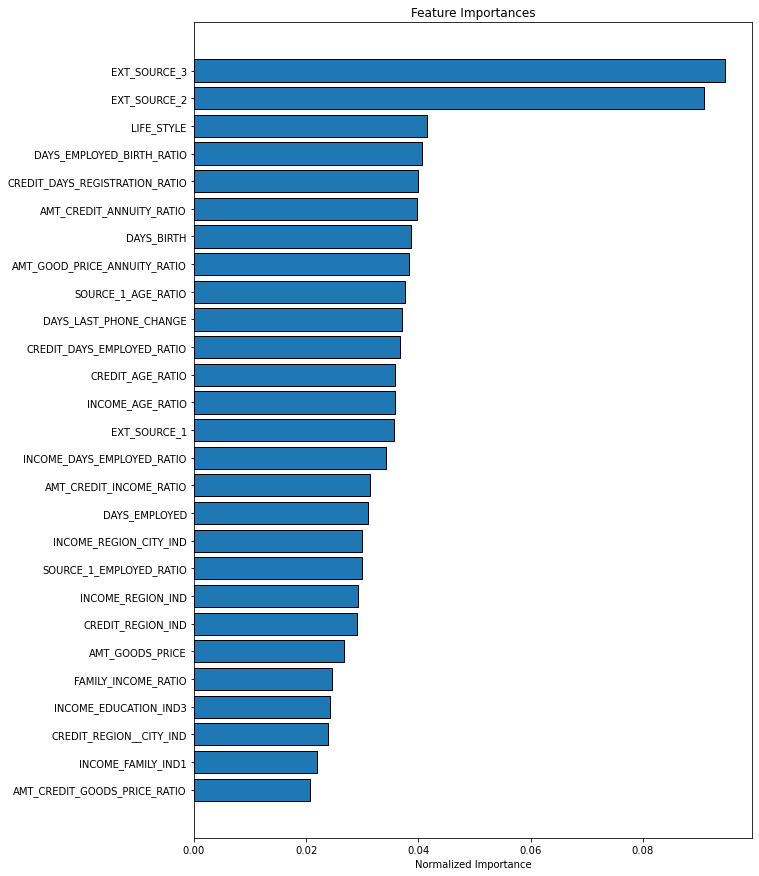

In [1324]:
random_forest.fit(X_train, y_train)
# Extract feature importances
features=list(X_train.columns)
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances_sorted = eng.plot_feature_importances(feature_importances, 90)

### 3.4 Standardization 

It is adviced to put the data in the same scale. It accelerates the training phase.

In [1488]:
#help(StandardScaler)

In [1430]:
# choose to standardize our data set and that to help training algos to reach quickly to optimum

In [1334]:
from sklearn.preprocessing import StandardScaler
feature_name=X.columns
X_index= X.index
scaler = StandardScaler()
X_Scaled=scaler.fit_transform(X)
Xs=pd.DataFrame(X_Scaled, columns=feature_name, index= X_index)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33, stratify=y.values, random_state=42)

In [1365]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33265, 27), (16385, 27), (33265,), (16385,))

## 4. Choix de modèles de classification


Since our data is balanced, at this step of the project, any classification model can be a candidate for training our data set. 

Therefore, we choose five classification models and push them through Bayes Optimization algorithm to find for each the best hyperparameters. 

We end up displaying for each of them, the performance on the training set and the test set. We then choosed the best model.


### 4.1 Why we choose Bayes Optimisation for model tuning

We choose Bayes Optimization over Grid Search and Random Search because it is quicker and helps to reach optimum more efficiently. 

More precisely, grid search is very computer intensive and dispite the fact it has the power to try all combinations possibles in the set of hyper parameters, it will miss intermediary informations. For example, for a hyper parameter C that has value [100, 200], it will not try 102, 103, ...199. We have to explicitly enter those values. 

The Random Search overcomes this drawback and choose for each parameter and distribution between the min and the max values to choose the best hyperparameter that fit better, but does this process blindly. 

Bayes Optimization use prior information to choose hyper space on which to choose the new hyper paremters that fit better the model. It uses a 'surorogate' model build on prior information to wisely choose hyper space on which to choose hyper parameters. Hence its efficiency.



In [1489]:
# hyper parameter spaces defintition for each model

from skopt.space import Real, Categorical, Integer

# logistic regression
logreg_spaces = {
    'solver': Categorical(['liblinear']),
    'penalty': Categorical(['l2']),
    'C': Real(0.01, 100)
     }


# k-nearest neighbors
knn_spaces = {
    'n_neighbors': Integer(1, 21),
    'weights': Categorical(['uniform', 'distance']),
    'metric': Categorical(['euclidean', 'manhattan', 'minkowski'] )
     }

# support vector machine for classification
svm_spaces = {
     'kernel': Categorical(['poly', 'rbf', 'sigmoid']),
     'C': Real(0.01, 50),
     'gamma': Categorical(['scale'])
     }

# random forest
rf_spaces = {
    'bootstrap': Categorical([True]),
    'max_depth': Integer(2,12),
    'max_features': Integer(2,20),
    'min_samples_leaf': Integer(3,5),
    'min_samples_split': Integer(8,12),
    'n_estimators': Integer(50,1000) }

# extreme gradient boosting

xgb_spaces ={'gamma': Real(0,0.5), 
                    'learning_rate': Real(0.1,0.5), 
                    'colsample_bylevel': Real(0.5,1), 
                    'colsample_bytree': Real(0.5,1), 
                    'colsample_bynode': Real(0.5, 1), 
                    'max_depth': Integer(1,8), 
                    'n_estimators': Integer(2,600) }


In [1492]:
# call back function
def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest SCORE : {}\n'.format(
        len(all_models),
        bayes_cv_tuner.best_score_
    ))
    

In [1493]:
# for Training we use each model's scoring method. It is likely to be accuracy

from skopt.space import Real, Categorical, Integer
from sklearn.linear_model import LogisticRegression  as LR
from sklearn.neighbors import KNeighborsClassifier  as KNN
from sklearn.svm import SVC as SVM
from sklearn.ensemble import RandomForestClassifier as RF
from xgboost import XGBClassifier as XGB
from sklearn.metrics import precision_score, recall_score, f1_score

In [1494]:
# bayesOptim fuctions with 15 iterations
def toOptim(MODEL, SPACES):
    return BayesSearchCV(
        estimator = MODEL(),
        search_spaces = SPACES,    
        cv = 3,
        n_iter = 15,   
        verbose = 0,
        refit = True,
        random_state = 42)

def toOptim_xgb(MODEL, SPACES):
    return BayesSearchCV(
        estimator = MODEL,
        search_spaces = SPACES,    
        cv = 3,
        n_iter = 15,   
        verbose = 0,
        refit = True,
        random_state = 42)

In [1449]:
# test to include  recall, precision and F1_score
#help(precision_score)

In [1495]:
# loop on each model, choose best HP, build score on test set and produce a dataframe of performances
MODEL=[] # known I should get it from somewhere
PERF_TRAINING_SET=[]
MODEL_ESTIMATE=[]

MODEL_SCORE_TEST_SET=[]

PRECISION_SCORE_TEST_SET=[]
RECALL_SCORE_TEST_SET=[]
F1_SCORE_TEST_SET=[]

XGB_P=XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2) # default param
temp_df=pd.DataFrame()


for m, s, n in zip([LR, KNN, SVM, RF, XGB], [logreg_spaces, knn_spaces, svm_spaces, rf_spaces , xgb_spaces],
                   ['LR','KNN','SVM', 'RF','XGB']):
    if m==XGB:
        m=XGB_P
        bayes_cv_tuner=toOptim_xgb(m, s)
        print(n)
        bayes_cv_tuner.fit(X_train.values, y_train.values, callback=status_print)
        MODEL.append(n)
        PERF_TRAINING_SET.append(bayes_cv_tuner.best_score_)
        MODEL_ESTIMATE.append(bayes_cv_tuner.best_estimator_)
    else :
        bayes_cv_tuner=toOptim(m, s)
        print(n)
        bayes_cv_tuner.fit(X_train.values, y_train.values, callback=status_print)
        MODEL.append(n)
        PERF_TRAINING_SET.append(bayes_cv_tuner.best_score_)
        MODEL_ESTIMATE.append(bayes_cv_tuner.best_estimator_)

temp_df['MODEL']=MODEL
temp_df['PERF_TRAINING_SET']= PERF_TRAINING_SET
temp_df['MODEL_ESTIMATE']=MODEL_ESTIMATE

for model in temp_df.MODEL_ESTIMATE:
    y_pred= model.predict(X_test)
    MODEL_SCORE_TEST_SET.append(model.score(X_test, y_test))
    PRECISION_SCORE_TEST_SET.append(precision_score(y_test,y_pred))
    RECALL_SCORE_TEST_SET.append(recall_score(y_test,y_pred))
    F1_SCORE_TEST_SET.append(f1_score(y_test,y_pred))

temp_df['MODEL_SCORE_TEST_SET']= MODEL_SCORE_TEST_SET
temp_df['PRECISION_SCORE_TEST_SET']= PRECISION_SCORE_TEST_SET
temp_df['RECALL_SCORE_TEST_SET']= RECALL_SCORE_TEST_SET
temp_df['F1_SCORE_TEST_SET']= F1_SCORE_TEST_SET

temp_df.to_csv("data/result_optim_bayes.csv")

LR
Model #1
Best SCORE : 0.6793025702690516

Model #2
Best SCORE : 0.6793326318953855

Model #3
Best SCORE : 0.6793326318953855

Model #4
Best SCORE : 0.6793326318953855

Model #5
Best SCORE : 0.6793326318953855

Model #6
Best SCORE : 0.6793326318953855

Model #7
Best SCORE : 0.6793326318953855

Model #8
Best SCORE : 0.6793326318953855

Model #9
Best SCORE : 0.6793326318953855

Model #10
Best SCORE : 0.6793326318953855

Model #11
Best SCORE : 0.6793326318953855

Model #12
Best SCORE : 0.6793326318953855

Model #13
Best SCORE : 0.6793326318953855

Model #14
Best SCORE : 0.6793326318953855

Model #15
Best SCORE : 0.6793326318953855

KNN
Model #1
Best SCORE : 0.6531188937321509

Model #2
Best SCORE : 0.6577183225612505

Model #3
Best SCORE : 0.6577183225612505

Model #4
Best SCORE : 0.6577183225612505

Model #5
Best SCORE : 0.6577183225612505

Model #6
Best SCORE : 0.6577183225612505

Model #7
Best SCORE : 0.6577183225612505

Model #8
Best SCORE : 0.6577183225612505

Model #9
Best SCORE :

[18:25:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model #7
Best SCORE : 0.6916578986923193

[18:25:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default

In [1496]:
temp_df.set_index('MODEL', inplace=True)

In [1497]:
temp_df[['PERF_TRAINING_SET', 'MODEL_SCORE_TEST_SET', 'PRECISION_SCORE_TEST_SET', 
         'RECALL_SCORE_TEST_SET', 'F1_SCORE_TEST_SET']]*100

,PERF_TRAINING_SET,MODEL_SCORE_TEST_SET,PRECISION_SCORE_TEST_SET,RECALL_SCORE_TEST_SET,F1_SCORE_TEST_SET
MODEL,,,,,
LR,67.933263,66.988099,67.452653,65.649414,66.538818
KNN,65.771832,65.688129,65.636408,65.844727,65.740402
SVM,68.026454,67.671651,68.082448,66.528320,67.296413
RF,68.687810,68.141593,68.427579,67.358398,67.888780
XGB,69.165790,68.654257,69.080919,67.529297,68.296296


In [1413]:
def getBestModel(df):
    for i in df.loc[df.PERF_TEST_SET ==max(df.PERF_TEST_SET)].MODEL_ESTIMATE :
        return i

In [1414]:
model=getBestModel(temp_df)
model

In [1419]:
# we can use the power XGB by trying early stopping

eval_set = [(X_test, y_test)]
eval_metric="auc"

model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, early_stopping_rounds=100, verbose=True)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-auc:0.64397
[1]	validation_0-auc:0.67859
[2]	validation_0-auc:0.70045
[3]	validation_0-auc:0.70895
[4]	validation_0-auc:0.71134
[5]	validation_0-auc:0.71567
[6]	validation_0-auc:0.72196
[7]	validation_0-auc:0.72537
[8]	validation_0-auc:0.72576
[9]	validation_0-auc:0.72699
[10]	validation_0-auc:0.72940
[11]	validation_0-auc:0.73082
[12]	validation_0-auc:0.73258
[13]	validation_0-auc:0.73359
[14]	validation_0-auc:0.73410
[15]	validation_0-auc:0.73475
[16]	validation_0-auc:0.73540
[17]	validation_0-auc:0.73577
[18]	validation_0-auc:0.73668
[19]	validation_0-auc:0.73698
[20]	validation_0-auc:0.73722
[21]	validation_0-auc:0.73793
[22]	validation_0-auc:0.73863
[23]	validation_0-auc:0.73926
[24]	validation_0-auc:0.73950
[25]	validation_0-auc:0.73983
[26]	validation_0-auc:0.74021
[27]	validation_0-auc:0.74039
[28]	validation_0-auc:0.74051
[29]	validation_0-auc:0.74057
[30]	validation_0-auc:0.74208
[31]	validation_0-auc:0.74225
[32]	validation_0-auc:0.74238
[33]	validation_0-au

[268]	validation_0-auc:0.75248
[269]	validation_0-auc:0.75259
[270]	validation_0-auc:0.75249
[271]	validation_0-auc:0.75245
[272]	validation_0-auc:0.75266
[273]	validation_0-auc:0.75266
[274]	validation_0-auc:0.75266
[275]	validation_0-auc:0.75261
[276]	validation_0-auc:0.75262
[277]	validation_0-auc:0.75265
[278]	validation_0-auc:0.75270
[279]	validation_0-auc:0.75271
[280]	validation_0-auc:0.75329
[281]	validation_0-auc:0.75330
[282]	validation_0-auc:0.75325
[283]	validation_0-auc:0.75326
[284]	validation_0-auc:0.75327
[285]	validation_0-auc:0.75325
[286]	validation_0-auc:0.75330
[287]	validation_0-auc:0.75332
[288]	validation_0-auc:0.75330
[289]	validation_0-auc:0.75324
[290]	validation_0-auc:0.75324
[291]	validation_0-auc:0.75319
[292]	validation_0-auc:0.75312
[293]	validation_0-auc:0.75316
[294]	validation_0-auc:0.75311
[295]	validation_0-auc:0.75310
[296]	validation_0-auc:0.75293
[297]	validation_0-auc:0.75291
[298]	validation_0-auc:0.75293
[299]	validation_0-auc:0.75284
[300]	va

## 5. Explanability of the model

We are going to try to explain the impact of our explaining variables on our response variable. To do so, we are going to use SHAP, an AI Explanabilty library. The explanations are made through Shap Values, but what is shap value?

From the library home site (), we can read that SHAP (SHapley Additive exPlanations) is a game-theoretic approach to explain the output of any machine learning model. *It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.*

To put it simple, Shapley values are measures of contributions of each predictor (feature) has in the ML model.

We are going to build a summary and a waterfall of Shap values.



In [ ]:
# It is on test data 
# But still no bad

In [ ]:
import shap

shap.initjs()

X_5 = X_train.sample(50, random_state=10)

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_50)


### 5.1 Summary of Shap Values

We an see for instance that DAYS_EMPLOYED's positive values have high effect on the prediction quality.


INCOME_DAYS_EMPLOYED RATIO's low values have high effect on the prediction quality.

...

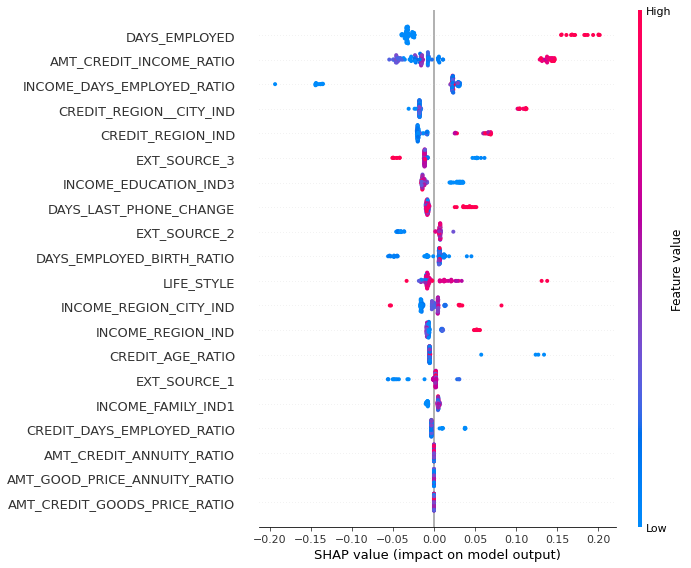

In [1422]:
shap.summary_plot(shap_values, Xs[:100])

### 5.2  The Waterfall



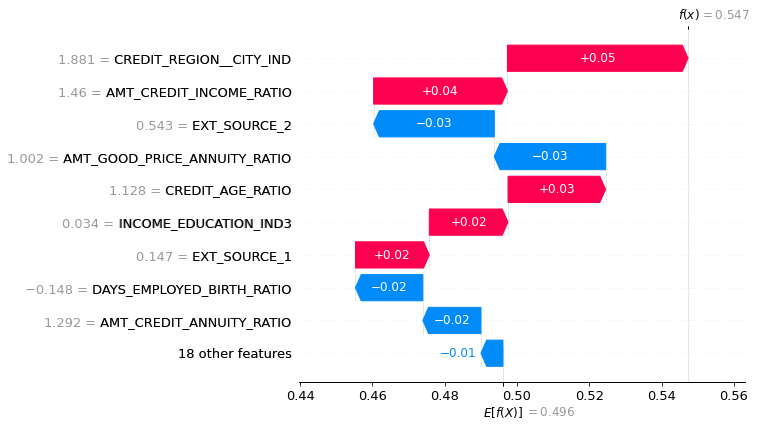

In [1428]:
# it is good to know these graphics are built on top of JavaScript
background = shap.maskers.Partition(Xs, max_samples=100)

def f(x):
    return shap.links.identity(model.predict_proba(x)[:,1])

explainer = shap.Explainer(f, background, link=shap.links.logit)

shap_values = explainer(Xs[:100])

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

We are drawing the waterfall for both outcomes: 0 repayment and 1 no repayment. 

For good clients, clients that repay their debt/credit, we can say that :

- CREDIT_REGION_CITY_IND has positive impact on client repayment. it means, the higher this indicator the more likely the client reimburse its credit. We can notice above that the same feature positive values have high effect on the prediction quality.

- AMT_CREDIT RATIO INCOME : the measure of a client capacity of repayment is good indicator to choose good clients. the higher this feature, the more likely, the repayment.

- and so on ...

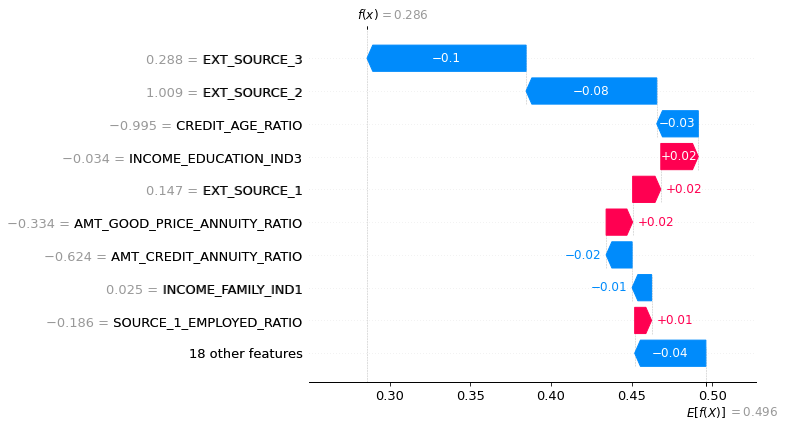

In [1429]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

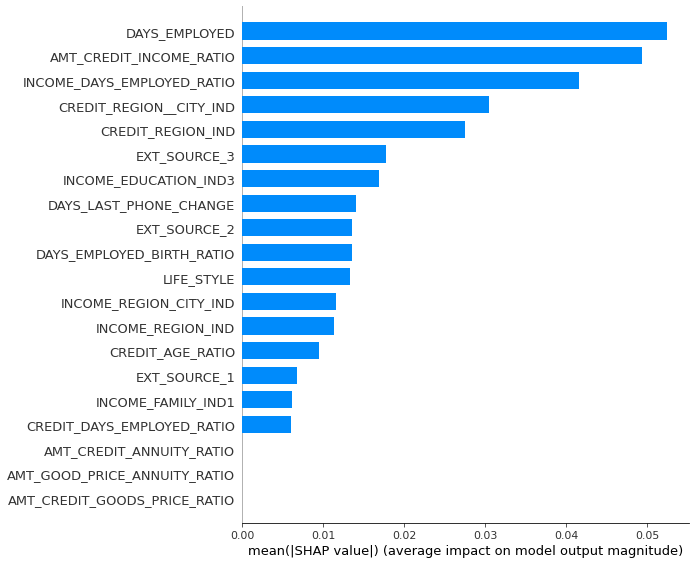

In [1423]:
# FEATURE IMPORTANCE WITH SHAP VALUES

shap.summary_plot(shap_values, Xs[:100], plot_type="bar")